In [1299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [1300]:
data = pd.read_csv('data.txt',names=['test1','test2','result'])
X_train = np.array(data.iloc[:,[0,1]])
y_train = np.array(data.iloc[:,2]).reshape(-1,1)

print(X_train.shape,y_train.shape)
print(np.mean(X_train,axis=0))

(118, 2) (118, 1)
[0.05477891 0.18310156]


In [1301]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
    
    plt.scatter(X[:58,:1],X[:58,1:2],label=positive_label)
    plt.scatter(X[58:,:1],X[58:,1:2],label=negative_label)
#positive_label and negative_label refers to classes of y as y can be 0 or 1
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
#write your code

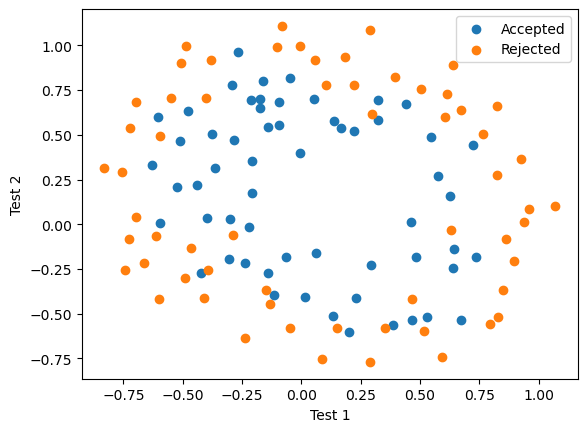

In [1302]:
plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc="upper right")
plt.show()

In [1303]:
#feature mapping
def map_feature(X1,X2):
    
    X1=np.atleast_1d(X1)
    X2=np.atleast_1d(X2)
    degree=6
    out=[]
    for i in range(1,degree+1):
        for j in range(i+1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)
#write your code


In [1304]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


**DO NOT CHANGE THE CODE BELOW**

In [1305]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [1306]:
#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
#write your code

In [1307]:
sigmoid_test(sigmoid)


Tests passed!


**DO NOT CHANGE THE CODE BELOW**

In [1308]:
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [1309]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
  h = np.vectorize(sigmoid)(np.dot(X,w) + b)  
  return -float(np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))/h.shape[0]

In [1310]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


/var/folders/0x/3x7q3g_j50g9253xwrgjp5700000gn/T/ipykernel_1516/2241698178.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))/h.shape[0]


In [1311]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
  total_cost = compute_cost(X,y,w,b)
  total_cost += lambda_*np.sum(w**2)/(2*len(y))



  return total_cost

**DO NOT CHANGE THE CODE BELOW**

In [1312]:
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [1313]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.661825255248395
All tests passed!


/var/folders/0x/3x7q3g_j50g9253xwrgjp5700000gn/T/ipykernel_1516/2241698178.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))/h.shape[0]


**DO NOT CHANGE THE CODE BELOW**

In [1314]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [1315]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
  h = np.vectorize(sigmoid)(np.dot(X,w) + b) 
  h = h - y
  dj_db = np.mean(h)
  dj_dw = np.dot(h,X)/h.shape[0]
  return dj_db,dj_dw

In [1316]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.49152542369248287
dj_dw at test_w: [[-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.054778908470092466, -0.18310155932051972], [-0.

In [1317]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code

  h = np.vectorize(sigmoid)(np.dot(X,w) + b) 
  h = h.reshape(-1,1)

  y = y.reshape(-1,1)
  h = h - y

  dj_db = np.mean(h)

  dj_dw = (np.dot(X.T,h)/h.shape[0]).reshape(w.shape) + lambda_*w/h.shape[0]
  
 
  return dj_db,dj_dw

**DO NOT CHANGE THE CODE BELOW**

In [1318]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [1319]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343654
Tests passed!


In [1320]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.1
iterations = 1000
alpha = 0.01
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
  w = initial_w
  b = initial_b
  J_history = []
  for i in range(iterations):
    J_history.append(compute_cost_reg(X_mapped,y_train,w,b,lambda_))
    db,dw = compute_gradient_reg(X_mapped,y_train,w,b,lambda_)
    w = w - alpha*dw
    b = b - alpha*db
    




  return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


/var/folders/0x/3x7q3g_j50g9253xwrgjp5700000gn/T/ipykernel_1516/2241698178.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -float(np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))/h.shape[0]


In [1321]:

#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p = sigmoid(np.dot(X,w)+b)
  
  p = np.where(p > 0.5,1,0)
  
  return p

Accuracy of training model: 66.101695


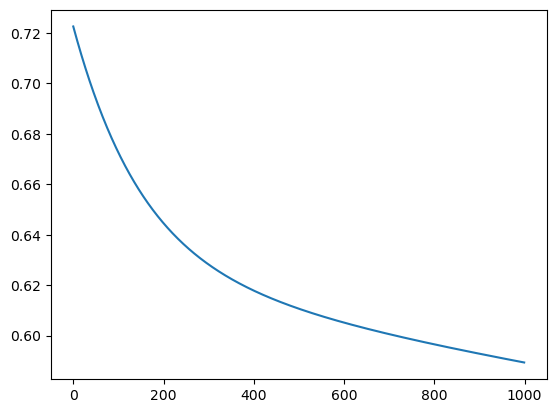

In [1322]:
p = predict(X_mapped, w, b)
y_train = y_train.reshape(p.shape)
# accuracy = 0
# for i in range(len(y_train)):
#     if (y_train[i] == p[i] ):
#         accuracy+=1
# print(accuracy)
print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))
plt.plot(np.arange(len(J_history)),np.array(J_history))
plt.show()

In [586]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
#write your code
    





SyntaxError: incomplete input (4182361751.py, line 7)

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)